## CanCovidData

[CanCovidData](https://github.com/mountainMath/CanCovidData) is an R package, written by [Jens von Bergmann](https://github.com/mountainMath) for gathering and processing sources of covid-19 data. It includes import functions for international and Canadian data and provides some helper functions for data processing and graphing.

The CanCovidData library has been installed for the R kernel used on this syzygy instance. It can be used directly, but if you are more familiar with python this notebook shows how to access it via the [rpy2 module](https://rpy2.github.io/).


In [1]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

/home/jupyter/.local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/home/jupyter/.local/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


`importr` the R library

In [ ]:
CanCovidData = importr("CanCovidData")

#provincial_data_r = CanCovidData.get_canada_official_provincial_data();
#country_data_r = CanCovidData.get_country_timeline_ecdc_jhs_data();
#country_data_official_r = CanCovidData.get_canada_official_provincial_data();
#country_data_uofs_r = CanCovidData.get_canada_UofS_case_data();
#bc_case_data_r = CanCovidData.get_british_columbia_case_data();
#bc_test_data_r = CanCovidData.get_british_columbia_test_data();
#canada_wg_cases = CanCovidData.get_canada_covid_working_group_cases();
canada_cansim_cases_r = CanCovidData.get_cansim_case_data();

In [113]:
with localconverter(ro.default_converter + pandas2ri.converter):
    ProvincialDF = ro.conversion.rpy2py(provincial_data_r)
    CountryDF = ro.conversion.rpy2py(country_data_r)
    BCTestDF = ro.conversion.rpy2py(bc_test_data_r)
    BCCaseDF = ro.conversion.rpy2py(bc_case_data_r)
    CanadaWGCasesDF = ro.conversion.rpy2py(canada_wg_cases)
    CountryDFOfficial = ro.conversion.rpy2py(country_data_official_r)
    CountryDFUofS = ro.conversion.rpy2py(country_data_uofs_r)
    CountryCanSimDF = ro.conversion.rpy2py(canada_cansim_cases_r)

In [114]:
CountryCanSimDF

,Case identifier number,REF_DATE,Date case was last updated - month,Date case was last updated - day,Episode date - month,Episode date - day,Gender,Age group,Transmission,Hospitalization,Intensive care unit,Death,"Hospitalization, previous status","Intensive care unit, previous status","Death, previous status",Date,Date2
1,1,2020,5.0,19.0,4.0,15.0,Male,30 to 39 years,Community exposure,Not Stated,Not Stated,No,9.0,9.0,2.0,18367.0,18401.0
2,2,2020,5.0,19.0,4.0,27.0,Female,0 to 19 years,Community exposure,No,Not Stated,Not stated,2.0,9.0,9.0,18379.0,18401.0
3,3,2020,5.0,19.0,4.0,16.0,Male,70 to 79 years,Community exposure,Not Stated,Not Stated,Not stated,9.0,9.0,9.0,18368.0,18401.0
4,4,2020,5.0,19.0,4.0,13.0,Male,30 to 39 years,Community exposure,No,Not Stated,Not stated,2.0,9.0,9.0,18365.0,18401.0
5,5,2020,5.0,20.0,5.0,2.0,Female,20 to 29 years,Community exposure,No,Not Stated,No,2.0,9.0,9.0,18384.0,18402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36564,36564,2020,5.0,20.0,4.0,18.0,Female,40 to 49 years,Community exposure,Not Stated,Not Stated,Not stated,NaN,NaN,NaN,18370.0,18402.0
36565,36565,2020,5.0,20.0,5.0,5.0,Female,50 to 59 years,Community exposure,Yes,Not Stated,Not stated,NaN,NaN,NaN,18387.0,18402.0
36566,36566,2020,5.0,20.0,4.0,20.0,Female,50 to 59 years,Community exposure,Not Stated,Not Stated,Not stated,NaN,NaN,NaN,18372.0,18402.0
36567,36567,2020,5.0,20.0,4.0,22.0,Female,50 to 59 years,Community exposure,Not Stated,Not Stated,Not stated,NaN,NaN,NaN,18374.0,18402.0


In [5]:
ProvincialDF

,PR_UID,prname,prnameFR,shortProvince,Date,Confirmed,Offical confirmed,Probable,Deaths,Official cases,Tested,Cases
1,35.0,Ontario,Ontario,ON,18292.0,3.0,3.0,0.0,0.0,3.0,NaN,3.0
2,59.0,British Columbia,Colombie-Britannique,BC,18292.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0
3,1.0,Canada,Canada,CAN,18292.0,4.0,4.0,0.0,0.0,4.0,NaN,4.0
4,35.0,Ontario,Ontario,ON,18300.0,3.0,3.0,0.0,0.0,0.0,NaN,0.0
5,59.0,British Columbia,Colombie-Britannique,BC,18300.0,4.0,4.0,0.0,0.0,3.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1118,60.0,Yukon,Yukon,YT,18402.0,11.0,11.0,0.0,0.0,NaN,1134.0,0.0
1119,61.0,Northwest Territories,Territoires du Nord-Ouest,NT,18402.0,5.0,5.0,0.0,0.0,NaN,1890.0,0.0
1120,62.0,Nunavut,Nunavut,NU,18402.0,0.0,0.0,0.0,0.0,NaN,676.0,0.0
1121,99.0,Repatriated,Voyageurs rapatriés,Repatriated,18402.0,13.0,13.0,0.0,NaN,NaN,76.0,0.0


In [15]:
BCCaseDF

,Reported Date,Health Authority,Age group,Sex
1,18336.0,Fraser,30-39,M
2,18344.0,Fraser,50-59,F
3,18348.0,Fraser,50-59,F
4,18354.0,Fraser,40-49,M
5,18362.0,Fraser,89+,F
...,...,...,...,...
1571,18366.0,Vancouver Coastal,Unknown,U
1572,18366.0,Vancouver Coastal,Unknown,U
1573,18366.0,Vancouver Coastal,Unknown,U
1574,18366.0,Vancouver Coastal,Unknown,U


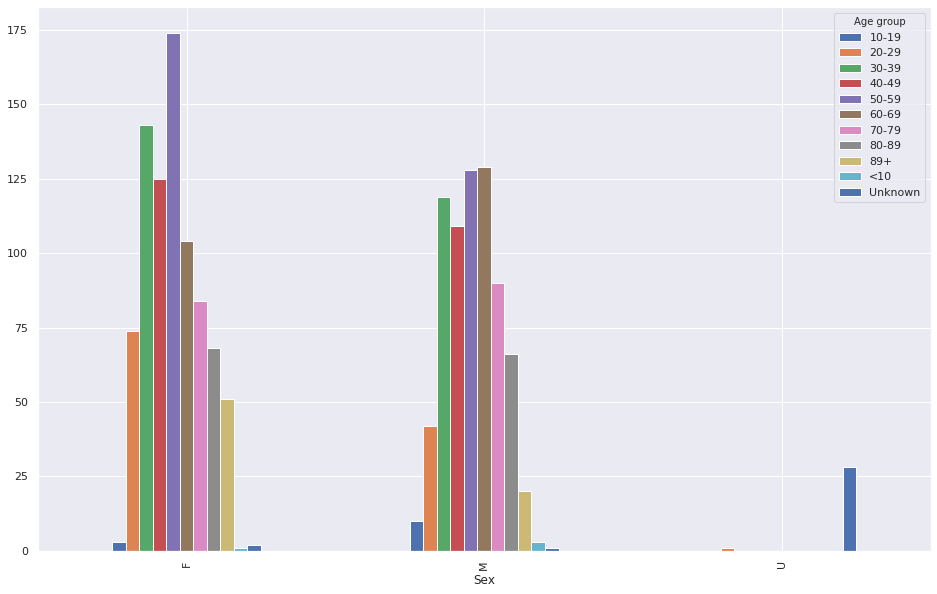

In [26]:
BCCaseDF.groupby('Sex')['Age group'].value_counts().unstack().fillna(0).plot(kind='bar')

In [30]:
statscanDF = pd.read_csv('https://www150.statcan.gc.ca/n1/tbl/csv/13100766-eng.zip')

ValueError: Multiple files found in compressed zip file ['13100766.csv', '13100766_MetaData.csv']

In [31]:
from zipfile import ZipFile

In [32]:
ZipFile?

In [33]:
!wget https://www150.statcan.gc.ca/n1/tbl/csv/13100766-eng.zip


--2020-05-20 18:21:41--  https://www150.statcan.gc.ca/n1/tbl/csv/13100766-eng.zip
Resolving www150.statcan.gc.ca (www150.statcan.gc.ca)... 205.193.226.160
Connecting to www150.statcan.gc.ca (www150.statcan.gc.ca)|205.193.226.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4759992 (4.5M) [application/zip]
Saving to: ‘13100766-eng.zip’

13100766-eng.zip    100%[===================>]   4.54M  1022KB/s    in 4.8s    

2020-05-20 18:21:46 (974 KB/s) - ‘13100766-eng.zip’ saved [4759992/4759992]



In [34]:
!unzip 13100766-eng.zip

Archive:  13100766-eng.zip
  inflating: 13100766.csv            
  inflating: 13100766_MetaData.csv   


In [35]:
statsCanDF = pd.read_csv('13100766.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
statsCanDF['REF_DATE']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
475379    2020
475380    2020
475381    2020
475382    2020
475383    2020
Name: REF_DATE, Length: 475384, dtype: int64

In [41]:
statsCanDF.head()

,REF_DATE,GEO,DGUID,Case identifier number,Case information,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020,Canada,2016A000011124,1,Date case was last updated - month,Number,223,units,0,v1146068950,1.1.1,5.0,NaN,NaN,NaN,0
1,2020,Canada,2016A000011124,1,Date case was last updated - day,Number,223,units,0,v1146068951,1.1.2,19.0,NaN,NaN,NaN,0
2,2020,Canada,2016A000011124,1,Episode date - month,Number,223,units,0,v1146068952,1.1.3,4.0,NaN,NaN,NaN,0
3,2020,Canada,2016A000011124,1,Episode date - day,Number,223,units,0,v1146068953,1.1.4,15.0,NaN,NaN,NaN,0
4,2020,Canada,2016A000011124,1,Gender,Number,223,units,0,v1146068954,1.1.5,1.0,NaN,NaN,NaN,0


In [42]:
!head 13100766.csv

﻿"REF_DATE","GEO","DGUID","Case identifier number","Case information","UOM","UOM_ID","SCALAR_FACTOR","SCALAR_ID","VECTOR","COORDINATE","VALUE","STATUS","SYMBOL","TERMINATED","DECIMALS"
"2020","Canada","2016A000011124","1","Date case was last updated - month","Number","223","units","0","v1146068950","1.1.1","5","","","","0"
"2020","Canada","2016A000011124","1","Date case was last updated - day","Number","223","units","0","v1146068951","1.1.2","19","","","","0"
"2020","Canada","2016A000011124","1","Episode date - month","Number","223","units","0","v1146068952","1.1.3","4","","","","0"
"2020","Canada","2016A000011124","1","Episode date - day","Number","223","units","0","v1146068953","1.1.4","15","","","","0"
"2020","Canada","2016A000011124","1","Gender","Number","223","units","0","v1146068954","1.1.5","1","","","","0"
"2020","Canada","2016A000011124","1","Age group","Number","223","units","0","v1146068955","1.1.6","3","","","","0"
"2020","Canada","2016A000011124","1","Transmission","Numbe

In [47]:
!wc -l 13100766.csv

475385 13100766.csv


In [48]:
475385 / 20

23769.25

In [56]:
pivotDF = pd.pivot_table(statsCanDF, index='Case identifier number', columns=['Case information'], values='VALUE')
pivotDF

Case information,Age group,Date case was last updated - day,Date case was last updated - month,Death,"Death, previous status",Episode date - day,Episode date - month,Gender,Hospitalization,"Hospitalization, previous status",Intensive care unit,"Intensive care unit, previous status",Transmission
Case identifier number,,,,,,,,,,,,,
1,3.0,19.0,5.0,2.0,2.0,15.0,4.0,1.0,9.0,9.0,9.0,9.0,2.0
2,1.0,19.0,5.0,9.0,9.0,27.0,4.0,2.0,2.0,2.0,9.0,9.0,2.0
3,7.0,19.0,5.0,9.0,9.0,16.0,4.0,1.0,9.0,9.0,9.0,9.0,2.0
4,3.0,19.0,5.0,9.0,9.0,13.0,4.0,1.0,2.0,2.0,9.0,9.0,2.0
5,2.0,20.0,5.0,2.0,9.0,2.0,5.0,2.0,2.0,2.0,9.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36564,4.0,20.0,5.0,9.0,NaN,18.0,4.0,2.0,9.0,NaN,9.0,NaN,2.0
36565,5.0,20.0,5.0,9.0,NaN,5.0,5.0,2.0,1.0,NaN,9.0,NaN,2.0
36566,5.0,20.0,5.0,9.0,NaN,20.0,4.0,2.0,9.0,NaN,9.0,NaN,2.0


In [69]:
inttypes= ['Gender', 
           'Age group', 
           'Date case was last updated - day',
           'Date case was last updated - month',
           'Death',
           'Death, previous status',
           'Episode date - day',
           'Episode date - month',
           'Gender',
           'Hospitalization',
           'Hospitalization, previous status',
           'Intensive care unit',
           'Intensive care unit, previous status',
           'Transmission'
          ]

for column in inttypes:
    pivotDF[column] = pd.to_numeric(pivotDF[column], downcast='integer')


In [92]:
pivotDF.head()

Case information,Age group,Date case was last updated - day,Date case was last updated - month,Death,"Death, previous status",Episode date - day,Episode date - month,Gender,Hospitalization,"Hospitalization, previous status",Intensive care unit,"Intensive care unit, previous status",Transmission,Age bin
Case identifier number,,,,,,,,,,,,,,
1,3,19,5,2,2.0,15,4,1,9,9.0,9,9.0,2,30.0
2,1,19,5,9,9.0,27,4,2,2,2.0,9,9.0,2,10.0
3,7,19,5,9,9.0,16,4,1,9,9.0,9,9.0,2,70.0
4,3,19,5,9,9.0,13,4,1,2,2.0,9,9.0,2,30.0
5,2,20,5,2,9.0,2,5,2,2,2.0,9,9.0,2,20.0


In [84]:
pivotDF['Age bin'] = pivotDF[pivotDF['Age group'] < 99]['Age group'] * 10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ed7015ad0>,
      dtype=object)

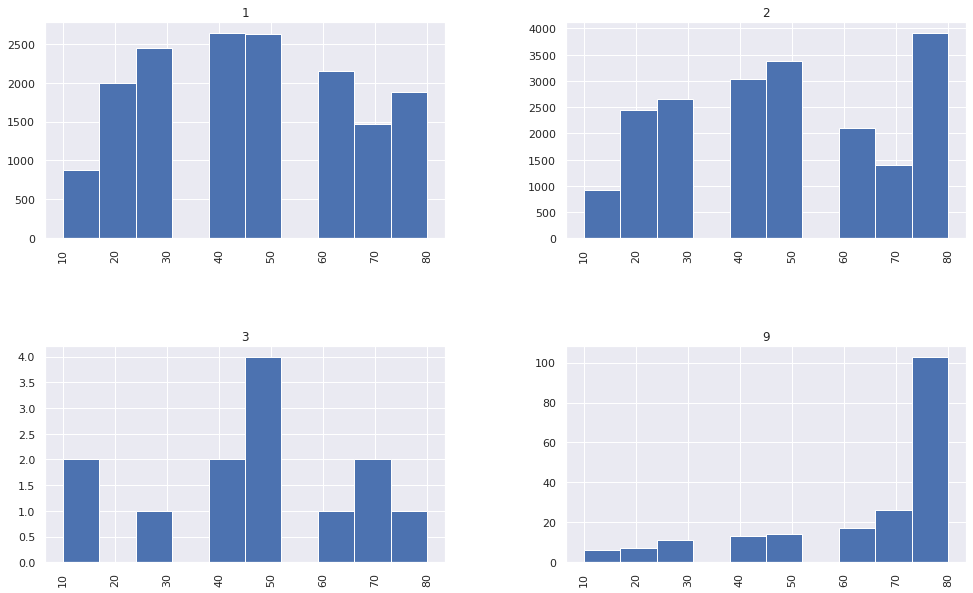

In [91]:
pivotDF['Age bin'].hist(by=pivotDF['Gender'])

In [94]:
sum(pivotDF.Gender < 3)

36330

Text(0.5, 1.0, 'Stats Canada Reported Cases by Gender and Age Group')

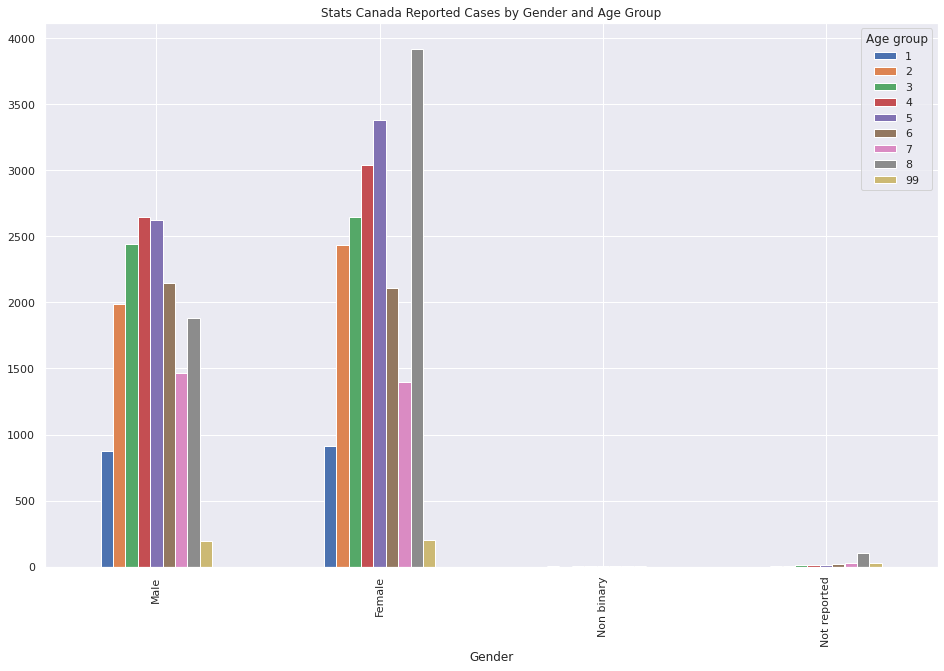

In [101]:
ax = pivotDF.groupby('Gender')['Age group'].value_counts().unstack().fillna(0).plot(kind='bar')
ax.set_xticklabels(['Male', 'Female', 'Non binary', 'Not reported'])
ax.set_title('Stats Canada Reported Cases by Gender and Age Group')

In [ ]:
ax.set_title